# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**15/01/2024**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

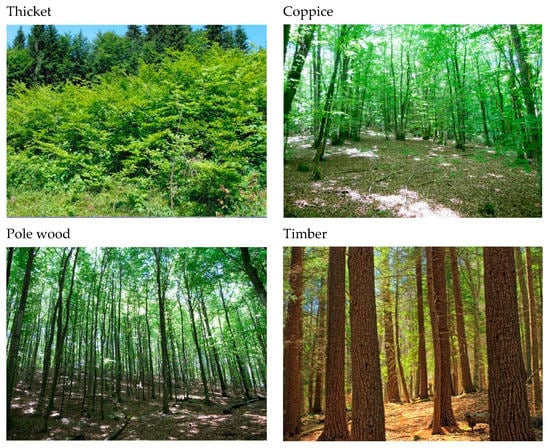

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
dataset_cub['Elevation'].describe()

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64

El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [6]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [7]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

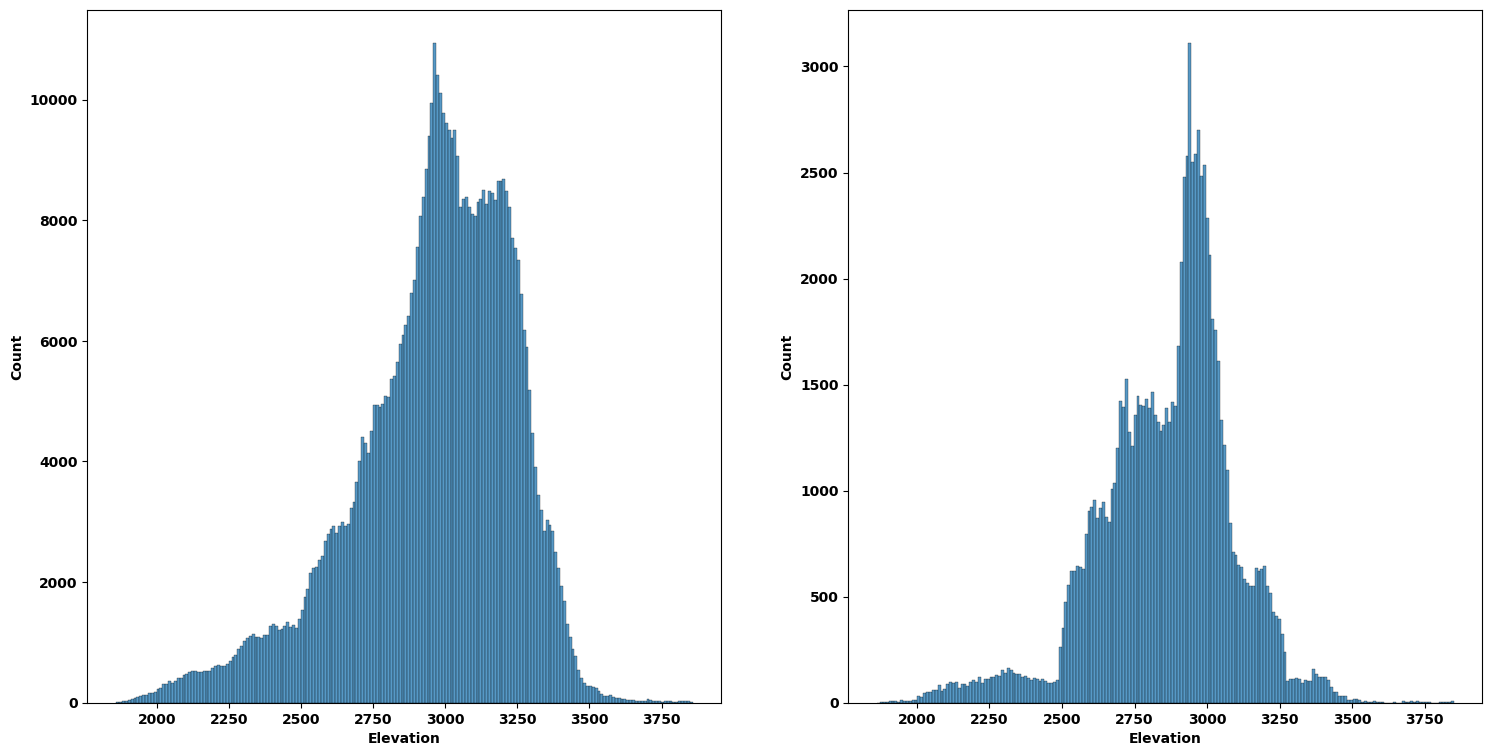

In [8]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que **la variable analizada no tiene la misma representación en el subconjunto** de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [9]:
100000/len(dataset_cub)

0.17211348474730298

In [10]:
df_cub = dataset_cub.sample(frac=0.17211348474730298, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [11]:
# Consultamos las principales estadísticas de la variable analizada anteriormente
display(dataset_cub['Elevation'].describe()[['count', 'mean', 'std']])
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

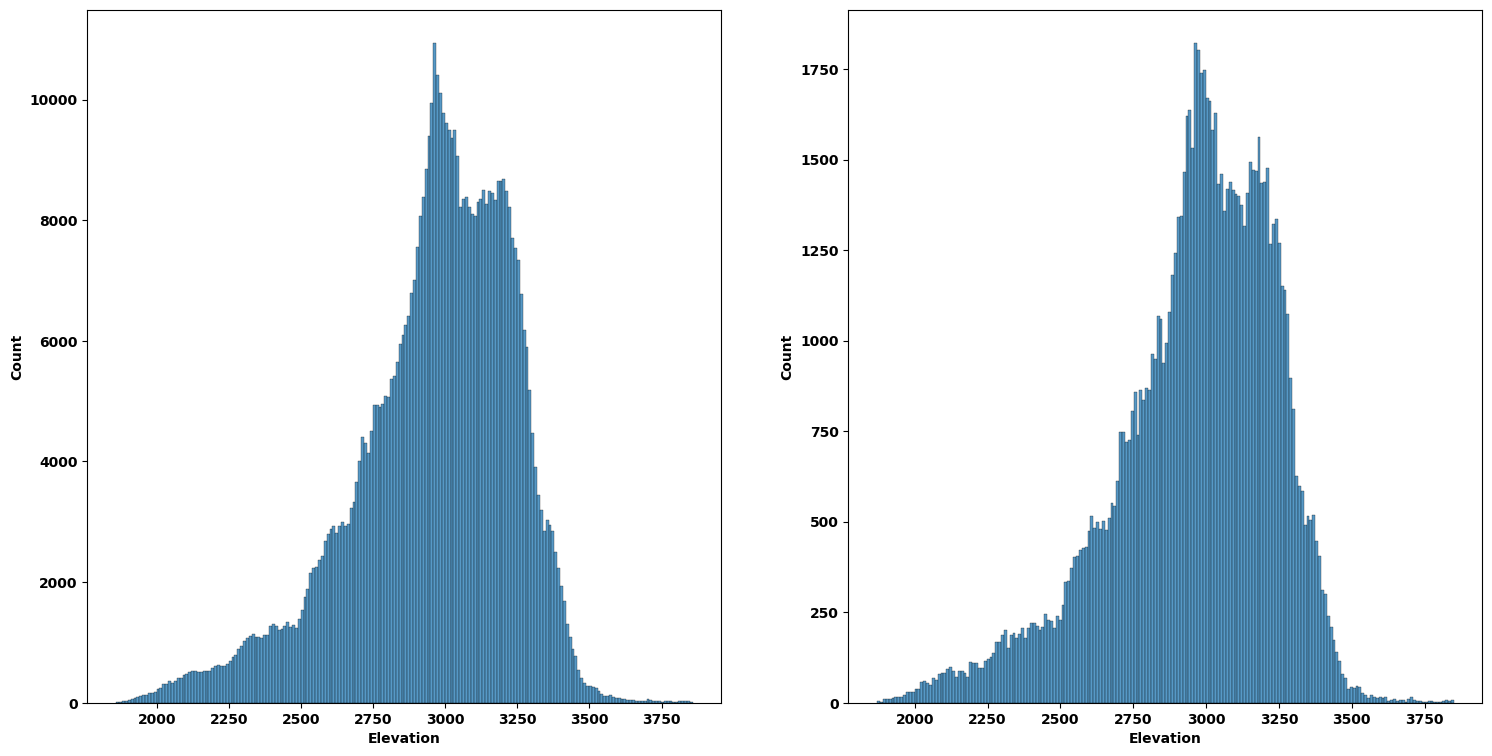

In [12]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

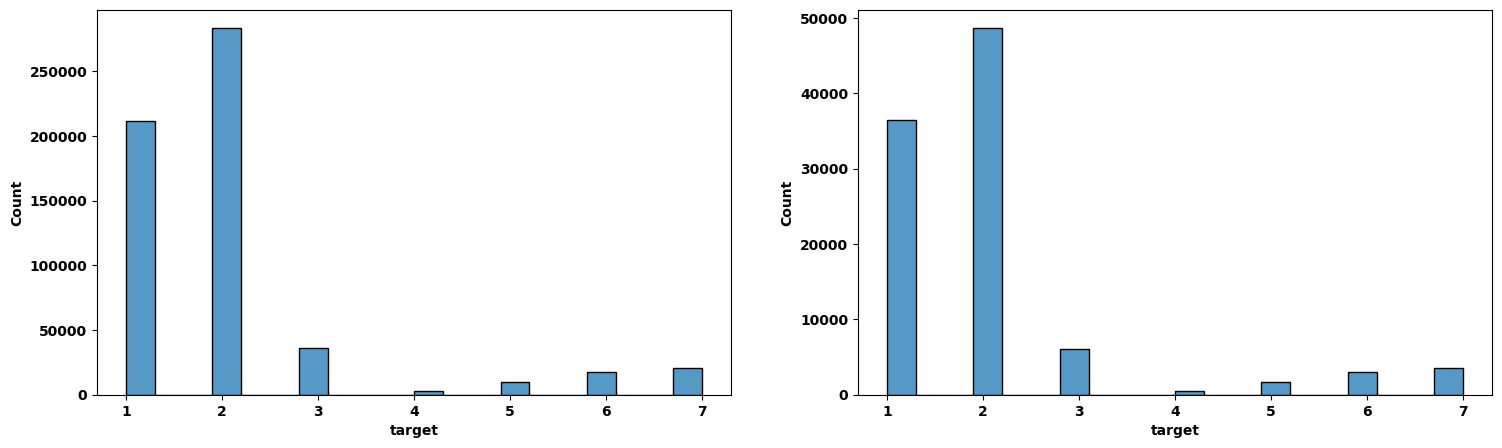

In [13]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [14]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [15]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [16]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [17]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [18]:
# Ejercicio 18.1:
target = 'target'
features = [x for x in df_cub.columns if x!=target]

print(features)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


In [19]:
from sklearn.tree import DecisionTreeRegressor

arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)
arbol_importancia.fit(X=df_cub[features], y=df_cub[target])
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

In [20]:
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia["imp_acum"] = importancia["Importancia"].cumsum()
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
df_cub_filt = df_cub.drop(labels=variables, axis='columns')
df_cub_filt


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`.
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**.

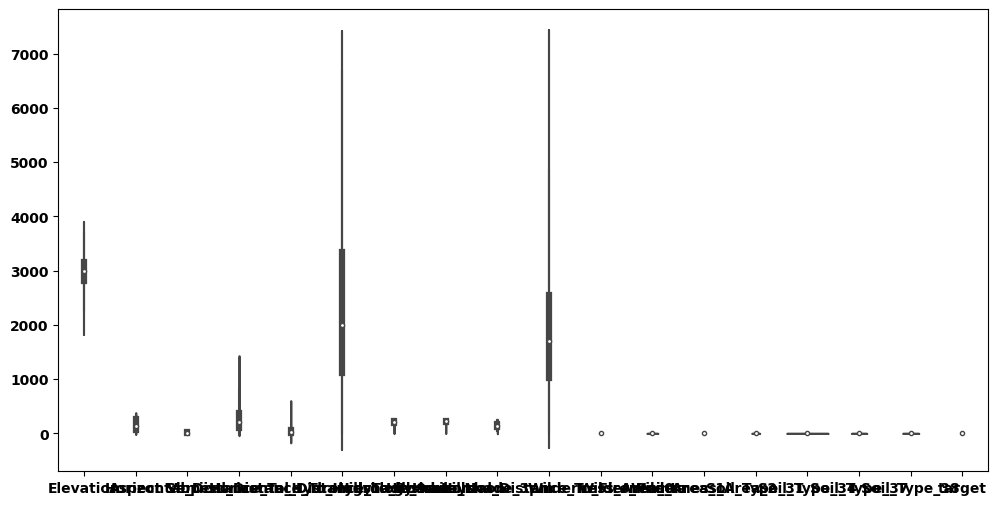

In [21]:
# Ejercicio 18.2.1:
sns.violinplot(data=df_cub_filt, orient='v')
plt.show()

#### Análisis 18.2.1:
Es necesario normalizar ya que al haber tanta diferencia entre las desviaciones estándar de nuestras variables se nos hace difícil hacer un estudio de cada una de ellas. De esta forma conseguimos poner a la misma escala todas las variables para su análisis.

In [22]:
# Ejercicio 18.2.2:
X = df_cub_filt.drop('target', axis='columns')
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y = df_cub_filt['target']
y

0        7
1        3
2        3
3        2
4        2
        ..
99995    2
99996    6
99997    2
99998    2
99999    1
Name: target, Length: 100000, dtype: int32

In [24]:
from sklearn.preprocessing import MinMaxScaler

escalado_18_2 = MinMaxScaler().fit(X)
dataset_normal = escalado_18_2.transform(X)
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
X_normal.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.550056,0.433131,0.213310,0.193105,0.277633,0.331101,0.835536,0.879496,0.563404,0.276884,0.450550,0.050680,0.435350,0.091120,0.003510,0.026360,0.023650
std,0.141488,0.310778,0.113126,0.152798,0.076618,0.219177,0.104595,0.077830,0.150657,0.185317,0.497551,0.219345,0.495805,0.287781,0.059141,0.160204,0.151957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474722,0.163889,0.136364,0.077698,0.226190,0.155965,0.779528,0.838583,0.470356,0.142578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568251,0.352778,0.196970,0.156835,0.255291,0.281720,0.858268,0.889764,0.565217,0.238839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653185,0.725000,0.272727,0.276259,0.306878,0.468737,0.909449,0.933071,0.664032,0.356166,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from sklearn.preprocessing import LabelEncoder

etiquetado_18_2 = LabelEncoder()
etiquetado_18_2.fit(y)
y_norm = etiquetado_18_2.transform(y)

y_norm

array([6, 2, 2, ..., 1, 1, 0])

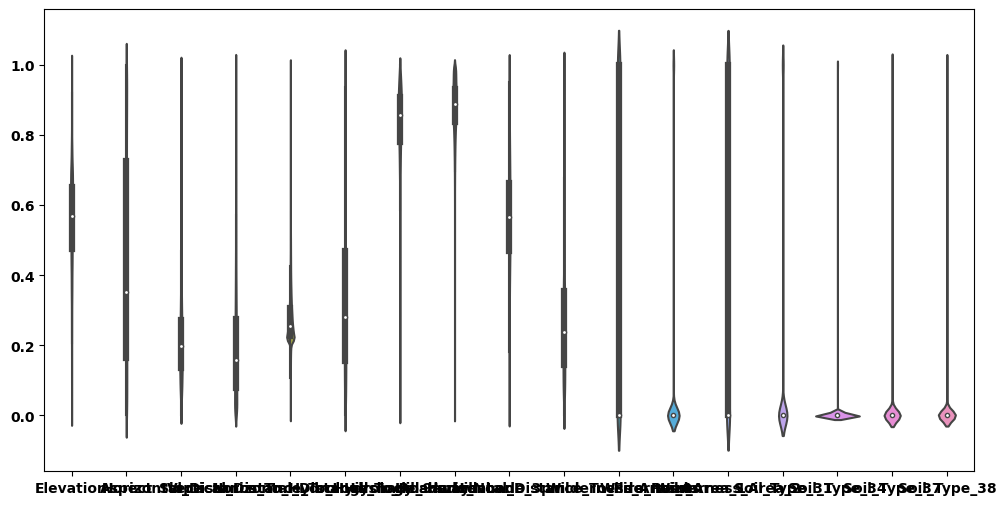

In [26]:
sns.violinplot(data=X_normal, orient='v')
plt.show()

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**. Teniendo en cuenta las siguientes indicaciones, primero divide el datset en _training_ y en _test_ y posteriormente, entrena un modelo de **regresión logística**, calcula las siguientes métricas para evaluar este modelo y analiza su rendimiendo:
- `random_state=100`
- Guarda el `20%` de los datos para testeo.
- Calcula las proporciones de los dos conjuntos creados. 
- Número máximo de iteraciones igual a `1000`
- Métricas:
    - Accuracy
    - Confusion matrix
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`


In [27]:
# Ejercicio 18.3:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_normal, y_norm, test_size=0.2, random_state=100)

print("Proporción del conjunto de entrenamiento:", X_train.shape[0]/X_normal.shape[0])
print("Proporción del conjunto de prueba:", X_test.shape[0]/X_normal.shape[0])

Proporción del conjunto de entrenamiento: 0.8
Proporción del conjunto de prueba: 0.2


In [28]:
log_r_18_3 = LogisticRegression(max_iter=1000, random_state=100, n_jobs=-1)

log_r_18_3.fit(X_train, y_train)
y_pred_18_3 = log_r_18_3.predict(X_test)

Accuracy:  0.70355
F1-score:  0.6896131787602487
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      7381
           1       0.72      0.80      0.76      9615
           2       0.60      0.71      0.65      1236
           3       0.67      0.05      0.10       114
           4       0.00      0.00      0.00       349
           5       0.38      0.16      0.22       616
           6       0.71      0.47      0.57       689

    accuracy                           0.70     20000
   macro avg       0.54      0.41      0.43     20000
weighted avg       0.69      0.70      0.69     20000



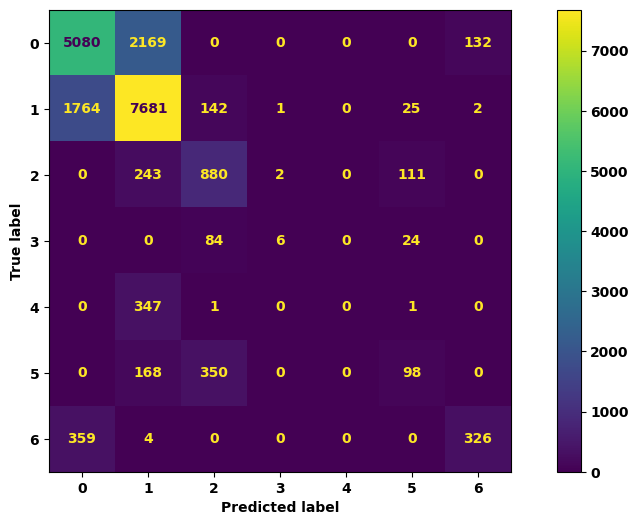

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(y_test, y_pred_18_3))
print("F1-score: ", f1_score(y_test, y_pred_18_3, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_18_3, zero_division=0))


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_18_3),
                               display_labels=log_r_18_3.classes_)
disp.plot()
plt.show()

#### Análisis 18.3:
El rendimiento de este modelo no está mal, sin embargo, hay mucho margen de mejora aún que podremos conseguir a lo largo de esta sesión. La matriz de confusión que vemos es más grande de lo normal ya que pese a que es un modelo de clasificación, en este caso, la variable objetivo no es binaria, hay más resultados posibles.

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelos basados en **Gradient Boosting**:  

**`18.4.1`** Entrena un modelo tipo ***XGBoost Classifire*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el primer modelo creado anteriormente. Consulta también, el **número** y la **profundidad máxima** de los árboles del bosque creado en este paso:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.2`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curves**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros _"óptimos"_ y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con **funciones de _numpy_** para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- define con funciones de _numpy_ este rango de profundidades máximas:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.3`** Saca la gráfica del *Learning Curve* para estos dos modelos, definiendo y aplicando una función que tome el valor de los hiperparámetros analizados como su entrada y que dibuje la evolución del rendimiento del modelo para el conjunto de _training_ y de _test_. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [30]:
# Ejercicio 18.4.1:
from xgboost import XGBClassifier 

modelo_xgb_18_4_1 = XGBClassifier(random_state=100) 
modelo_xgb_18_4_1.fit(X_train, y_train) 
y_pred_xgb_18_4_1 = modelo_xgb_18_4_1.predict(X_test)

In [63]:
arboles = modelo_xgb_18_4_1.get_booster().get_dump()
numero_de_arboles = len(arboles)
print(f"Número de árboles: {numero_de_arboles}")

profundidad_maxima = max([arbol.count("leaf") for arbol in arboles])
print(f"Profundidad máxima de los árboles: {profundidad_maxima}")

Número de árboles: 700
Profundidad máxima de los árboles: 64


In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_18_4_1))
print("F1-score: ", f1_score(y_test, y_pred_xgb_18_4_1, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb_18_4_1, zero_division=0))

Accuracy:  0.8464
F1-score:  0.8452445692356796
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      7381
           1       0.84      0.88      0.86      9615
           2       0.85      0.85      0.85      1236
           3       0.85      0.82      0.84       114
           4       0.83      0.48      0.61       349
           5       0.77      0.73      0.75       616
           6       0.93      0.89      0.91       689

    accuracy                           0.85     20000
   macro avg       0.85      0.78      0.81     20000
weighted avg       0.85      0.85      0.85     20000



#### Análisis 18.4.1:
En este modelo hemos mejorado bastante el rendimiento con respecto al anterior (tenemos 0.14 más de accuracy y 0.17 más de f1-score). Pese a quue ya tenemos un my buen rendimiento aún queda margen de mejora.

El mejor valor de n_estimators podría ser = 500 que consigue un Accuracy = 0.89625


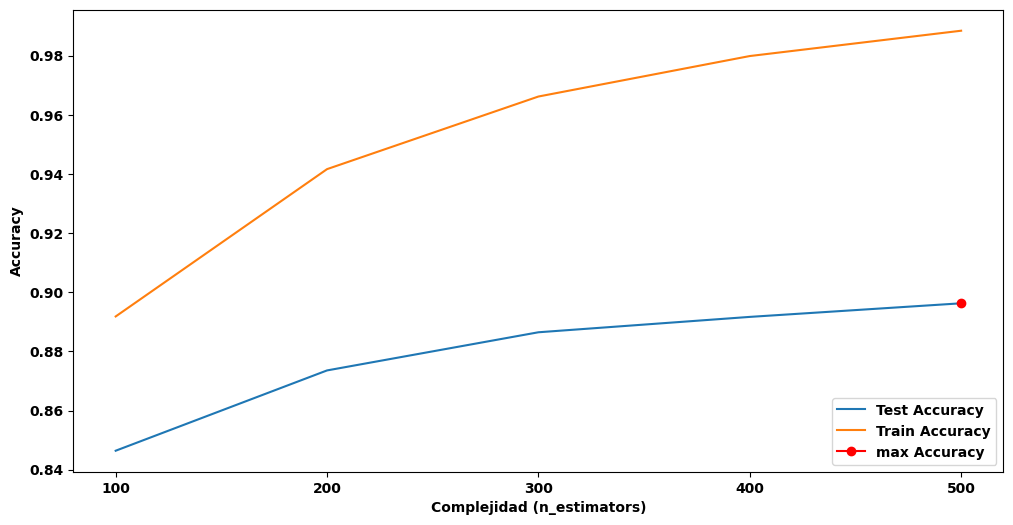

In [39]:
# Ejercicio 18.4.2:
hiper_param_estimators = np.arange(100,501,100)

train_score_estimators = np.zeros(hiper_param_estimators.size) 
test_score_estimators = np.zeros(hiper_param_estimators.size) 

for i in range(hiper_param_estimators.size):
    modelo_xgb = XGBClassifier(n_estimators=hiper_param_estimators[i], random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_estimators[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_estimators[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de n_estimators podría ser =", hiper_param_estimators[np.argmax(test_score_estimators)],
      "que consigue un Accuracy =", max(test_score_estimators))

plt.plot(hiper_param_estimators, test_score_estimators, label='Test Accuracy')
plt.plot(hiper_param_estimators, train_score_estimators, label='Train Accuracy')
plt.plot(hiper_param_estimators[np.argmax(test_score_estimators)], max(test_score_estimators),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_estimators)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 18 que consigue un Accuracy = 0.92485


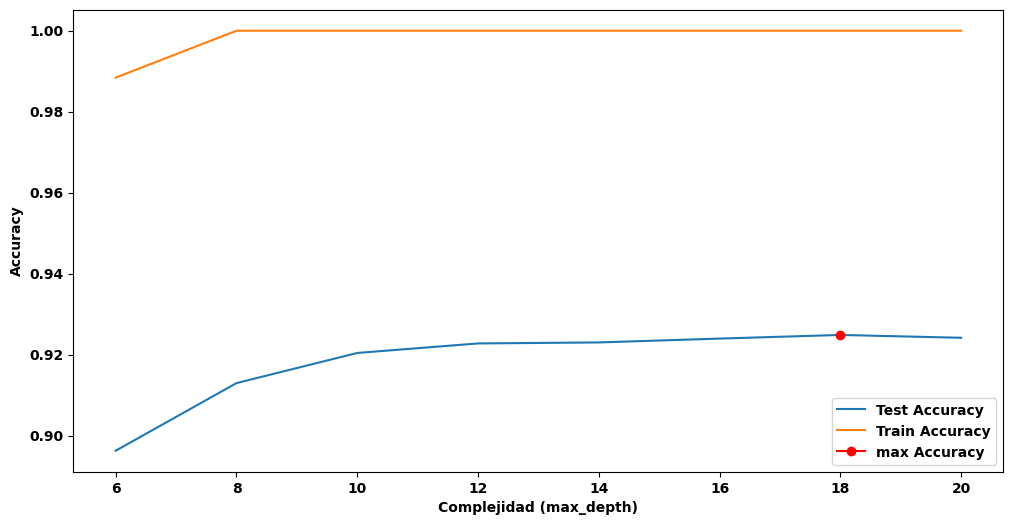

In [41]:
best_n_estimator = hiper_param_estimators[np.argmax(test_score_estimators)]
hiper_param_depths = np.arange(6,21,2)

train_score_depths = np.zeros(hiper_param_depths.size) 
test_score_depths = np.zeros(hiper_param_depths.size) 

for i in range(hiper_param_depths.size):
    modelo_xgb = XGBClassifier(n_estimators=best_n_estimator, max_depth=hiper_param_depths[i], random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_depths[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_depths[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de max_depth podría ser =", hiper_param_depths[np.argmax(test_score_depths)],
      "que consigue un Accuracy =", max(test_score_depths))

plt.plot(hiper_param_depths, test_score_depths, label='Test Accuracy')
plt.plot(hiper_param_depths, train_score_depths, label='Train Accuracy')
plt.plot(hiper_param_depths[np.argmax(test_score_depths)], max(test_score_depths),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_depths)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.1 que consigue un Accuracy = 0.92485


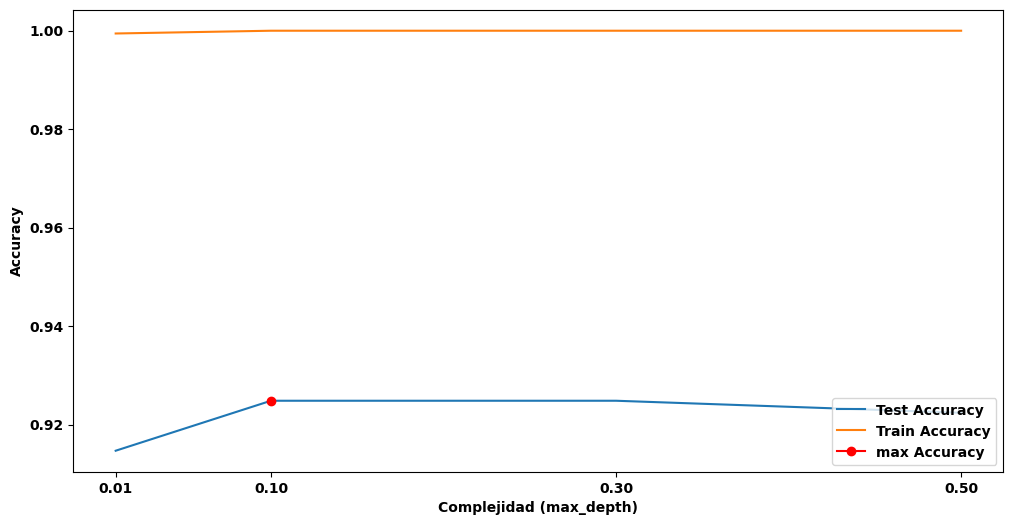

In [43]:
best_n_estimator = hiper_param_estimators[np.argmax(test_score_estimators)]
best_max_depth = hiper_param_depths[np.argmax(test_score_depths)]
hiper_param_learning_rate = [0.01, 0.1, 0.3, 0.5]

train_score_learning_rate = np.zeros(len(hiper_param_learning_rate)) 
test_score_learning_rate = np.zeros(len(hiper_param_learning_rate)) 

for i in range(len(hiper_param_learning_rate)) :
    modelo_xgb = XGBClassifier(learning_rate=hiper_param_learning_rate[i], n_estimators=best_n_estimator, max_depth=best_max_depth, random_state=100, n_jobs=-1) 
    modelo_xgb.fit(X_train, y_train)
    train_score_learning_rate[i] = accuracy_score(y_train, modelo_xgb.predict(X_train)) 
    test_score_learning_rate[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))    

print("El mejor valor de learning_rate podría ser =", hiper_param_learning_rate[np.argmax(test_score_learning_rate)],
      "que consigue un Accuracy =", max(test_score_learning_rate))

plt.plot(hiper_param_learning_rate, test_score_learning_rate, label='Test Accuracy')
plt.plot(hiper_param_learning_rate, train_score_learning_rate, label='Train Accuracy')
plt.plot(hiper_param_learning_rate[np.argmax(test_score_learning_rate)], max(test_score_learning_rate),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_learning_rate)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [45]:
modelo_xgb_18_4_2 = XGBClassifier(learning_rate=hiper_param_learning_rate[np.argmax(test_score_learning_rate)], n_estimators=best_n_estimator, max_depth=best_max_depth, random_state=100, n_jobs=-1) 
modelo_xgb_18_4_2.fit(X_train, y_train)
y_pred_xgb_18_4_2 = modelo_xgb_18_4_2.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_18_4_2))
print("F1-score: ", f1_score(y_test, y_pred_xgb_18_4_2, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_xgb_18_4_2, zero_division=0))

Accuracy:  0.92485
F1-score:  0.9244600428061165
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7381
           1       0.92      0.95      0.94      9615
           2       0.90      0.90      0.90      1236
           3       0.83      0.82      0.82       114
           4       0.85      0.68      0.76       349
           5       0.86      0.83      0.84       616
           6       0.95      0.93      0.94       689

    accuracy                           0.92     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.92      0.92      0.92     20000



#### Análisis 18.4.2:
En este modelo hemos conseguido mejorar aún mas el rendimiento con respecto a los anteriores, cierto es que el proceso hasta que hemos encontrado este modelo ha sido un poco más tedioso. Sin embargo, su nivel de rendimiento ya entra en un rango que se acerca mucho más a la perfección (1).

In [47]:
# Ejercicio 18.4.3:
def curva_aprendizaje_18_4_2(n_estimators: int, max_depth: int, learning_rate: float):
    modelo_arbol = XGBClassifier(random_state=100, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, n_jobs=-1)

    num_samples = np.linspace(1000, X_train.shape[0], 10).astype(int)

    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo XGBC')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show() 

La diferencia final del rendimiento del modelo entre training y test es=  0.045399999999999996


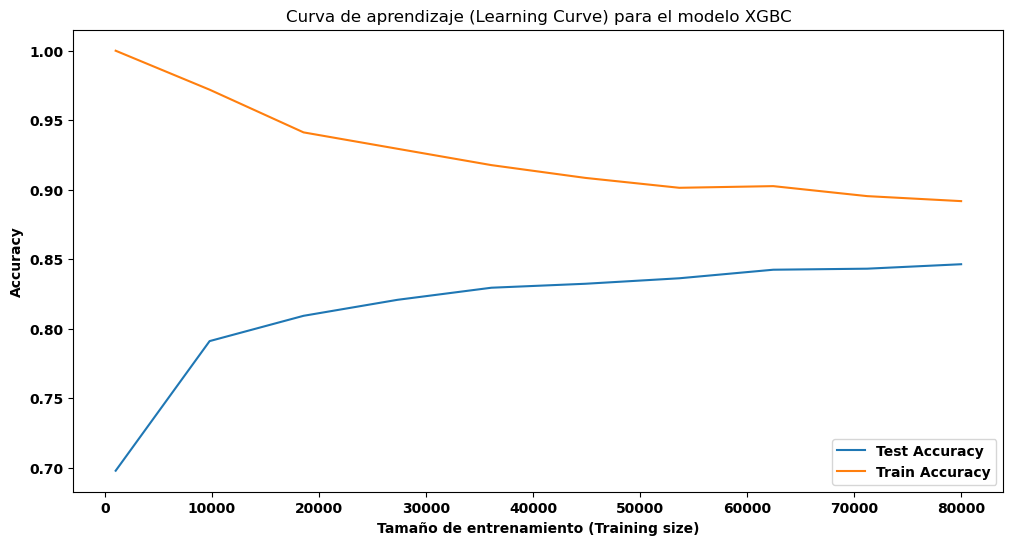

In [48]:
curva_aprendizaje_18_4_2(modelo_xgb_18_4_1.get_params()['n_estimators'],
                         modelo_xgb_18_4_1.get_params()['max_depth'], 
                         modelo_xgb_18_4_1.get_params()['learning_rate'])

La diferencia final del rendimiento del modelo entre training y test es=  0.07515000000000005


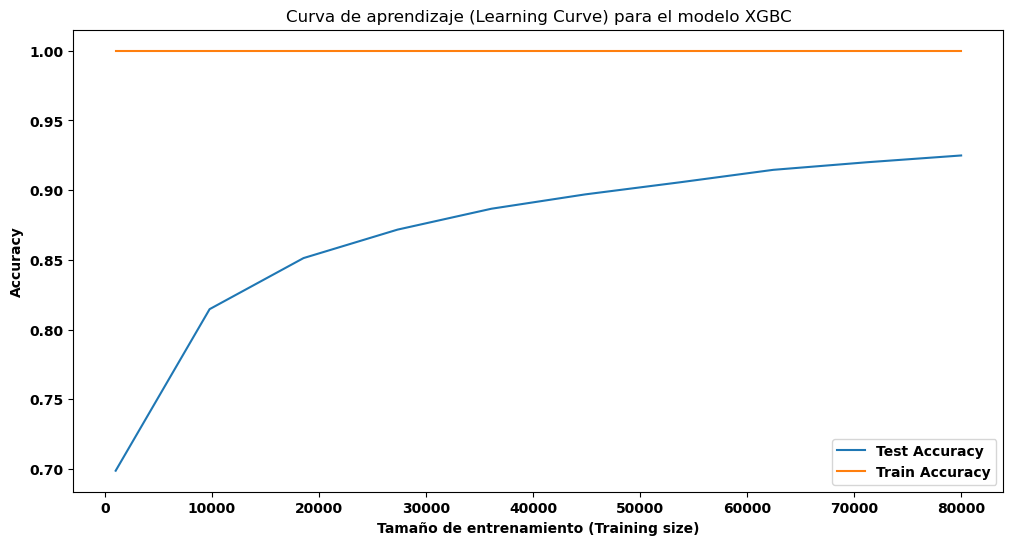

In [49]:
curva_aprendizaje_18_4_2(modelo_xgb_18_4_2.get_params()['n_estimators'],
                         modelo_xgb_18_4_2.get_params()['max_depth'], 
                         modelo_xgb_18_4_2.get_params()['learning_rate'])

#### Análisis 18.4.3:
Considero qe el modelo con mayor preferencia es el segundo ya que a medida que aumenta el tamaño del conjunto de entrenamiento, el conjunto de prueba mejora su accuracy. Además, tiene tendencia ascendente y pese a que el GAP es un poco mayor que el del primer ejercicio, la evolución de la curva del segundo parece más prometedora y podemos esperar quue si el conjunto de entrenamiento sigue creciendo ambas líneas convergerán en un muy buen nivel de accuracy.

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales Artificiales**:  

**`18.5.1`** Entrena un modelo tipo ***Multi-layer Perceptron classifier*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.2`** Entrena otro modelo del mismo tipo indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (_**DNN**-Deep Neural Networks_) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores y explica cuál sería **el mejor modelo que elegirías** para este problema de clasificación multi-clase:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`
- Explica si este modelo o algún otro modelo de todos los puntos realizados en este ejercicio, tiene **el mejor remdimiento en general** para ser elegido como **el clasificador de la cubierta forestal**.

In [50]:
# Ejercicio 18.5.1:
from sklearn.neural_network import MLPClassifier

modelo_mlpc_18_5_1 = MLPClassifier(random_state=100)
modelo_mlpc_18_5_1.fit(X_train, y_train)
y_pred_mlpc_18_5_1 = modelo_mlpc_18_5_1.predict(X_test)

/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
print("Accuracy: ", accuracy_score(y_test, y_pred_mlpc_18_5_1))
print("F1-score: ", f1_score(y_test, y_pred_mlpc_18_5_1, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_mlpc_18_5_1, zero_division=0))

Accuracy:  0.7598
F1-score:  0.7560638103814095
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      7381
           1       0.81      0.74      0.77      9615
           2       0.74      0.82      0.78      1236
           3       0.80      0.61      0.70       114
           4       0.61      0.20      0.30       349
           5       0.61      0.44      0.52       616
           6       0.84      0.77      0.80       689

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.66     20000
weighted avg       0.76      0.76      0.76     20000



#### Análisis 18.5.1:
En este modelo, el rendimiento ha vuelto a caer. No es del todo malo pero después de los valores tan buenos que hemos visto en el ejemplo anterior deja mucho que desear. La parte buena es que aún podemos seguir jugando con los hiperparámetros del modelo

In [56]:
# Ejercicio 18.5.2:
modelo_mlpc_18_5_2 = MLPClassifier(random_state=100, 
                                   hidden_layer_sizes=(100,200,100),
                                   max_iter=10000,
                                   alpha=1e-5,
                                   tol=1e-5)
modelo_mlpc_18_5_2.fit(X_train, y_train)
y_pred_mlpc_18_5_2 = modelo_mlpc_18_5_2.predict(X_test)

In [55]:
print("Accuracy: ", accuracy_score(y_test, y_pred_mlpc_18_5_2))
print("F1-score: ", f1_score(y_test, y_pred_mlpc_18_5_2, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_mlpc_18_5_2, zero_division=0))

Accuracy:  0.8764
F1-score:  0.8757795425664509
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7381
           1       0.90      0.89      0.89      9615
           2       0.87      0.87      0.87      1236
           3       0.86      0.82      0.84       114
           4       0.78      0.52      0.62       349
           5       0.75      0.78      0.77       616
           6       0.91      0.89      0.90       689

    accuracy                           0.88     20000
   macro avg       0.85      0.81      0.82     20000
weighted avg       0.88      0.88      0.88     20000



#### Análisis 18.5.2:
Como mencionaba en el ejercicio anterior, al cambiar algunos hiperparámetros, el rendimiento vuelve a mejorar bastante. Sin embargo, podemos seguir trabajando para mejorar el rendimiento aún más.

In [57]:
# Ejercicio 18.5.3:
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from keras.backend import clear_session

clear_session()

semilla = 883
random.seed(semilla)  
np.random.seed(semilla)  
tf.random.set_seed(semilla)  

modelo_ks_18_5_3 = Sequential()
modelo_ks_18_5_3.add(Input(shape=(X_train.shape[1],)))
modelo_ks_18_5_3.add(Dense(100, activation='relu'))
modelo_ks_18_5_3.add(Dense(200, activation='relu'))
modelo_ks_18_5_3.add(Dense(100, activation='relu'))
modelo_ks_18_5_3.add(Dense(1, activation='sigmoid'))

modelo_ks_18_5_3.compile(loss='binary_crossentropy', optimizer='Adam')

registros_18_5_3 = modelo_ks_18_5_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

y_pred_ks_18_5_3 = modelo_ks_18_5_3.predict(X_test)
y_pred_keras_18_5_3 = np.where(y_pred_ks_18_5_3 < 0.5, 0, 1)



2024-01-20 18:12:23.090634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
800/800 [==============================] - 3s 2ms/step - loss: -142473.6250 - val_loss: -701454.8125
Epoch 2/50
800/800 [==============================] - 1s 2ms/step - loss: -4223321.5000 - val_loss: -10214868.0000
Epoch 3/50
800/800 [==============================] - 1s 2ms/step - loss: -25670598.0000 - val_loss: -44471932.0000
Epoch 4/50
800/800 [==============================] - 2s 2ms/step - loss: -79841264.0000 - val_loss: -116880496.0000
Epoch 5/50
800/800 [==============================] - 1s 2ms/step - loss: -179749872.0000 - val_loss: -239931360.0000
Epoch 6/50
800/800 [==============================] - 1s 2ms/step - loss: -339940384.0000 - val_loss: -427754272.0000
Epoch 7/50
800/800 [==============================] - 1s 2ms/step - loss: -574656704.0000 - val_loss: -695917184.0000
Epoch 8/50
800/800 [==============================] - 1s 2ms/step - loss: -900159488.0000 - val_loss: -1056215744.0000
Epoch 9/50
800/800 [==============================] - 1s 2ms/step -

In [58]:
print("Accuracy: ", accuracy_score(y_test, y_pred_keras_18_5_3))
print("F1-score: ", f1_score(y_test, y_pred_keras_18_5_3, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_keras_18_5_3, zero_division=0))

Accuracy:  0.4799
F1-score:  0.3339463349653761
Classification Report: 
              precision    recall  f1-score   support

           0       0.48      0.04      0.07      7381
           1       0.48      0.97      0.64      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.48     20000
   macro avg       0.14      0.14      0.10     20000
weighted avg       0.41      0.48      0.33     20000



#### Análisis 18.5.3:
En este ejercicio, el rendimiento ha caído en picado por completo, tenemos los peores valores de la sesión por el momento con este modelo.

In [59]:
# Ejercicio 18.5.4:
clear_session()

semilla = 883
random.seed(semilla)  
np.random.seed(semilla)  
tf.random.set_seed(semilla)  

modelo_ks_18_5_4 = Sequential()
modelo_ks_18_5_4.add(Input(shape=(X_train.shape[1],)))

modelo_ks_18_5_4.add(Dense(50, activation='relu'))
modelo_ks_18_5_4.add(Dense(100, activation='relu'))
modelo_ks_18_5_4.add(Dense(200, activation='relu'))
modelo_ks_18_5_4.add(Dense(1000, activation='relu'))
modelo_ks_18_5_4.add(Dense(200, activation='relu'))
modelo_ks_18_5_4.add(Dense(100, activation='relu'))
modelo_ks_18_5_4.add(Dense(50, activation='relu'))


modelo_ks_18_5_4.add(Dense(1, activation='sigmoid'))

modelo_ks_18_5_4.compile(loss='binary_crossentropy', optimizer='Adam')

registros_18_5_4 = modelo_ks_18_5_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

y_pred_ks_18_5_4 = modelo_ks_18_5_4.predict(X_test)
y_pred_keras_18_5_4 = np.where(y_pred_ks_18_5_4 < 0.5, 0, 1)

Epoch 1/50
800/800 [==============================] - 6s 6ms/step - loss: -81597818732544.0000 - val_loss: -759377329913856.0000
Epoch 2/50
800/800 [==============================] - 5s 6ms/step - loss: -47925499946598400.0000 - val_loss: -207848070342246400.0000
Epoch 3/50
800/800 [==============================] - 5s 6ms/step - loss: -1453941400012849152.0000 - val_loss: -3857886959825321984.0000
Epoch 4/50
800/800 [==============================] - 5s 6ms/step - loss: -12390252497384505344.0000 - val_loss: -25197653109277458432.0000
Epoch 5/50
800/800 [==============================] - 5s 6ms/step - loss: -57346163642657144832.0000 - val_loss: -99795079424949354496.0000
Epoch 6/50
800/800 [==============================] - 4s 6ms/step - loss: -191411533965663666176.0000 - val_loss: -299361726318199701504.0000
Epoch 7/50
800/800 [==============================] - 4s 6ms/step - loss: -512694461101345079296.0000 - val_loss: -749008853676729565184.0000
Epoch 8/50
800/800 [==============

In [60]:
print("Accuracy: ", accuracy_score(y_test, y_pred_keras_18_5_4))
print("F1-score: ", f1_score(y_test, y_pred_keras_18_5_4, average='weighted'))
print("Classification Report: ")
print(classification_report(y_test, y_pred_keras_18_5_4, zero_division=0))

Accuracy:  0.48075
F1-score:  0.3121668917778153
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7381
           1       0.48      1.00      0.65      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.48     20000
   macro avg       0.07      0.14      0.09     20000
weighted avg       0.23      0.48      0.31     20000



#### Análisis 18.5.4:
En este último modelo el rendimiento sigue siendo pésimo.  

El mejor modelo de esta sesión ha sido el del ejercicio 18.4.2 con una accuracy de 0.92, además no se trata de un modelo pesado en cuanto a recursos, por eso pienso que sería la mejor elección como clasificador de cubiertas forestales.